In [1]:
#%pip install statsmodels
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
analysis = pd.read_csv("/Users/donjhaiholland/repos/CDC-chronic/data/analysis_p1.csv")
# analysis.isnull().sum()
# analysis.shape


analyze_2019 = analysis[
     (analysis["YearStart"] == 2019) & (analysis["YearEnd"] == 2019)
 ][["LocationAbbr", "diabetes_y", "poverty_x", "LocationDesc"]]


Slope estimate: 0.332
95% CI: (0.251, 0.412)


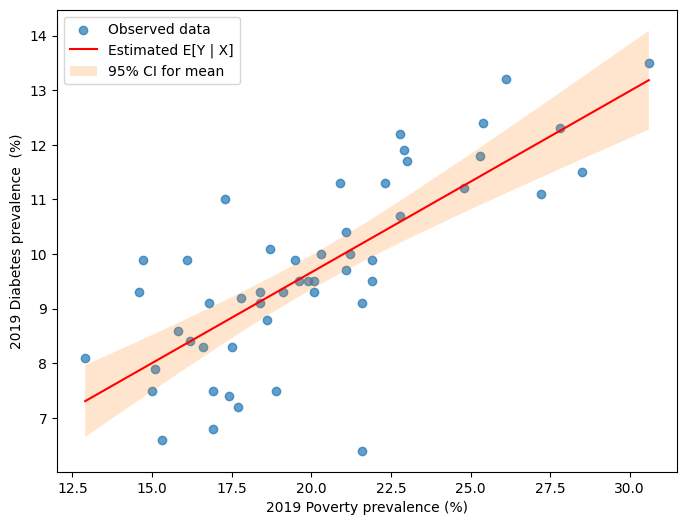

In [3]:
# 2019 Model
# x for plotting (1D)
x = analyze_2019["poverty_x"]
y = analyze_2019["diabetes_y"]

# X for modeling (2D: const + x)
X = sm.add_constant(x)

# Fit 
results = sm.OLS(y, X).fit()

# Get estimated coefficient & confidence interval
coef = results.params["poverty_x"]
ci_low, ci_high = results.conf_int().loc["poverty_x"]

print(f"Slope estimate: {coef:.3f}")
print(f"95% CI: ({ci_low:.3f}, {ci_high:.3f})")

# Prediction intervals / CI for the mean
pred = results.get_prediction(X)
pred_df = pred.summary_frame()

# Sort by x so the line/band doesn't zig-zag
order = np.argsort(x.values)
x_sorted = x.values[order]

# Best estimate of avg diabetes prevelance across states
y_hat = results.fittedvalues.values[order]

# Confidence interval for the mean
ci_l = pred_df["mean_ci_lower"].values[order]
ci_u = pred_df["mean_ci_upper"].values[order]

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y, alpha=0.7, label="Observed data")
ax.plot(x_sorted, y_hat, "r-", label="Estimated E[Y | X]")
ax.fill_between(x_sorted, ci_l, ci_u, alpha=0.2, label="95% CI for mean")

ax.set_xlabel("2019 Poverty prevalence (%)")
ax.set_ylabel("2019 Diabetes prevalence  (%)")
ax.legend()
plt.show()


In [ ]:
# Comparing p-value & test stat
# Don't need p-value since 0 is not included in CI
